<a href="https://colab.research.google.com/github/Vinicius-BFS/data_science_projetos/blob/main/Mini_Projeto_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg)







#**Contextualização**
Walmart, Inc., é uma multinacional estadunidense de lojas de
departamento.
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de
outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972.
No ano de 2021, obteve um um lucro de $13.51 Bilhões.
Sendo uma das principais lojas de varejo do mundo, os dados contemplam
as vendas semanais de 45 lojas espalhadas pelos Estados Unidos.

O Walmart realiza vários eventos promocionais de descontos ao longo do
ano.
Essas remarcações precedem feriados importantes, os quatro maiores de
todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o
Natal.
As semanas que incluem esses feriados têm um peso maior.


Dataset: https://www.kaggle.com/yasserh/walmart-dataset

## **Objetivo**
* levantar o faturamento das lojas nos USA e apontar qual loja seria melhor para expansão do seu tamanho.


### **Dicionário de dados**
#### **Variáveis:**
**Store:** Número da Loja

**Date:** Semana de Venda

**Weekly_Sales:** Venda Naquela Semana

**Holiday_Flag:**Flag se é ou não semana com feriado (1 - Holiday Week 0 - Non-Holiday Week)

**Temperature:** Temperatura do dia em °F

**Fuel_Price:** Preço do combustível na região da loja

**CPI:** Índice de preços ao consumidor

**Unemployment:** Taxa de desemprego

--------------------//------------------------//------------------//---------------//----------------//----------------//----------------//----------------//----------------
#### **Informações:**
**Super Bowl:**  12-Feb-10, 11-Feb-11, 10-Feb-12

**Labour Day:** 10-Sep-10, 09-Sep-11, 07-Sep-12

**Thanksgiving:** 26-Nov-10, 25-Nov-11, 23-Nov-12

**Christmas:** 31-Dec-10, 30-Dec-11, 28-Dec-12

#Preparando o ambiente

In [ ]:
#!pip install kaggle #install the kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
#Bibliotecas
import pandas as pd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ver todas as colunas
pd.options.display.max_columns = None

In [3]:
# Configuração inicial
sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif',
               'fontname': 'Times New Roman'})

In [5]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"viniciussaturno","key":"e93be6879c5a41a49528d166ff5db7b8"}'}

In [6]:
# #provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# #Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
!chmod 600 ~/.kaggle/kaggle.json

# #endereço da API para o download do dataset
!kaggle datasets download -d yasserh/walmart-dataset

# #Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 57.6MB/s]
Archive:  walmart-dataset.zip
  inflating: Walmart.csv             


#Análise Exploratória

### Base de dados

In [7]:
df = pd.read_csv('Walmart.csv', sep=",", encoding="UTF-8")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Estrutura dos dados

In [8]:
# Resumo
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
print("\nVariáveis: \n", df.columns.tolist())

Linhas:  6435
Colunas:  8

Variáveis: 
 ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [9]:
dic_list = {"nValores Ausentes": df.isnull().sum(),"nValores Únicos":df.nunique()}
pd.DataFrame(dic_list)

,nValores Ausentes,nValores Únicos
Store,0,45
Date,0,143
Weekly_Sales,0,6435
Holiday_Flag,0,2
Temperature,0,3528
Fuel_Price,0,892
CPI,0,2145
Unemployment,0,349


Percebe-se que não há dados faltantes na base.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Campo de data está em formato de string

### Transformação dos dados

In [11]:
df['Date'] = pd.to_datetime(df["Date"])

In [12]:
#Criando campo de mês e ano
df['weekday_sale'] = df.Date.dt.weekday
df['month_sale'] = df.Date.dt.month
df['year_sale'] = df.Date.dt.year

In [13]:
#Retirando campo de data do df
#df.drop(['Date'], axis=1, inplace=True)

In [14]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday_sale,month_sale,year_sale
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010


### Analisando as variáveis

In [15]:
#principais estatísticas do df
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday_sale,month_sale,year_sale
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


In [16]:
lst = ['Date','Store', 'Holiday_Flag',
       'CPI', 'month_sale', 'year_sale', 'weekday_sale']
features = [i for i in df.columns if i not in lst]
print(features)

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Unemployment']


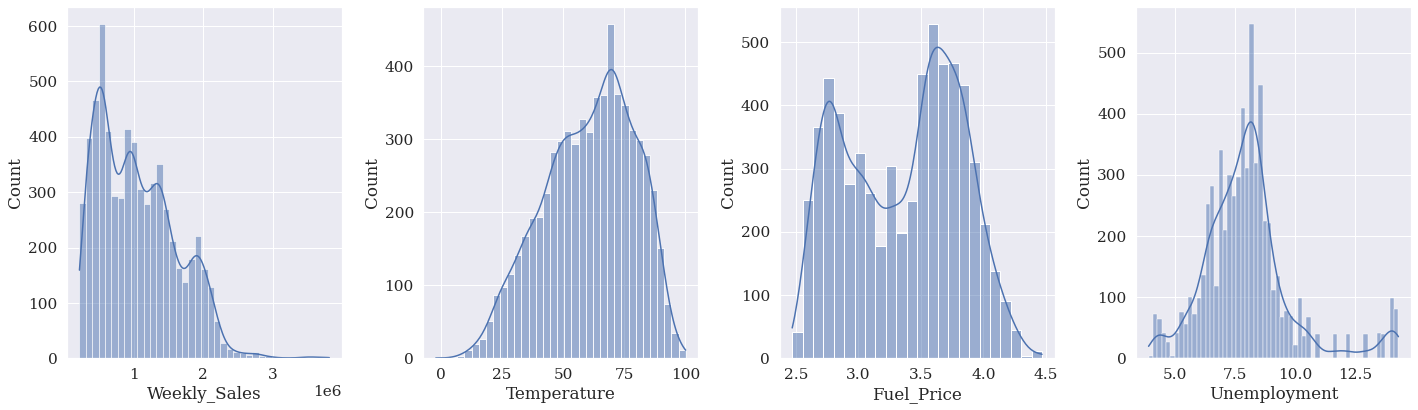

In [17]:
plt.figure(figsize = (20, 6))
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.histplot(x = df[features[i]], kde = True)
    plt.xlabel(features[i])
    plt.tight_layout()

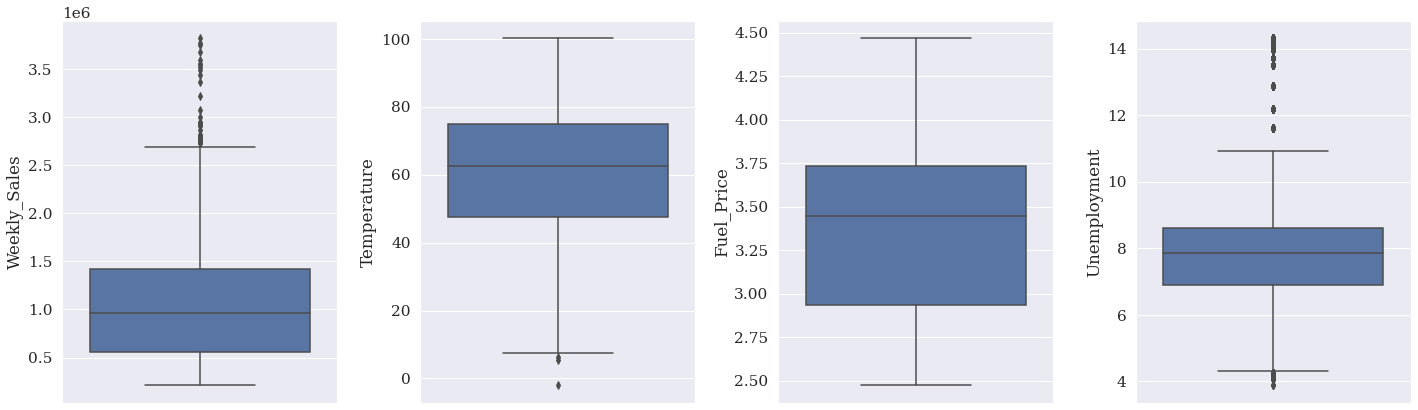

In [18]:
plt.figure(figsize = (20, 6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]])
    plt.tight_layout()

Obeservando a distribuição dos dados, notamos que somente a variável `Temperature` possui uma distribuição próxima a normal. E notório a presença de alguns outiliers, mas nada muito discrepante

In [19]:
cf = ['Holiday_Flag', 'year_sale', 'weekday_sale', 'month_sale', 'Store']

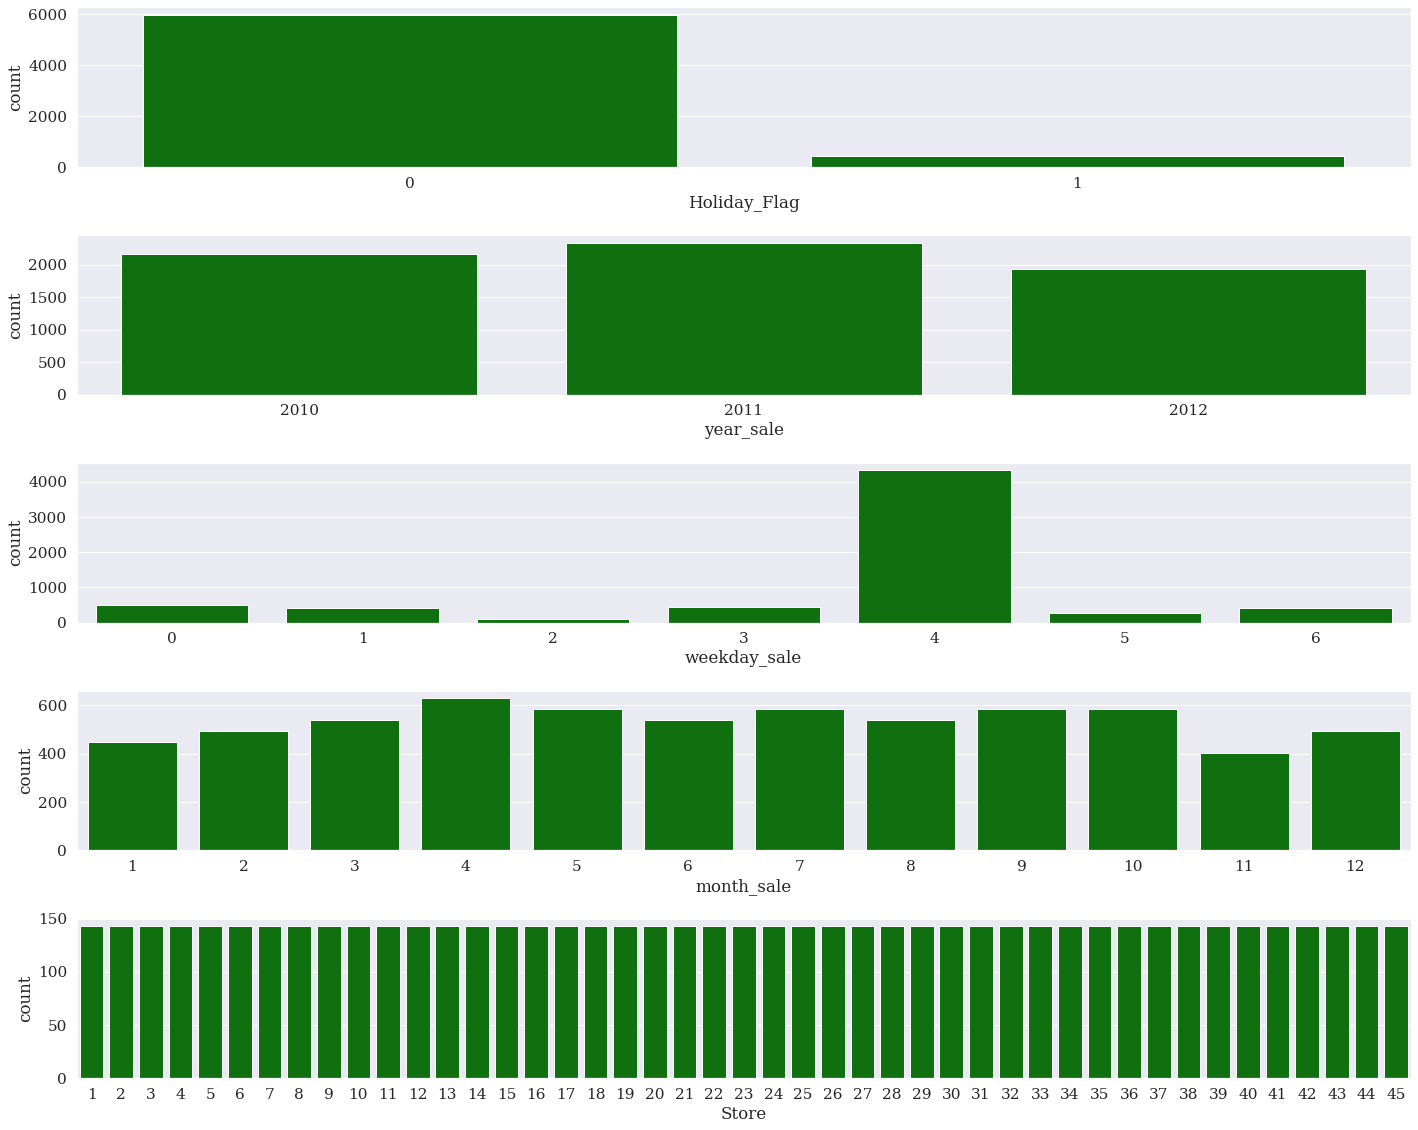

In [20]:
#df_sample = df.sample(1000, random_state = 42)
plt.figure(figsize = (20, 16))
for i in range(0, len(cf)):
    plt.subplot(5, 1, i+1)
    sns.countplot(x = df[cf[i]], color = 'green', orient = 'v')
    plt.tight_layout()

* Percebe-se que a quantidade de vendas é maior para dias úteis o que é normal
* Nota-se um declínio nas vendas conforme os anos se passam
* As sextas-feiras são os dias com maior incidência de vendas
* Percebe-se que as vendas tendem a subir no 1º Tri. Novembro apresenta uma queda brusca nas vendas

### Engenharia de Features

In [21]:
feriados = {'Date':['2010-02-12','2011-02-11','2012-02-10',
                    '2010-09-10','2011-09-09','2012-09-07',
                    '2010-11-26','2011-11-25','2012-11-23',
                    '2010-12-31','2011-12-30','2012-12-28'],
            'holiday':['Super Bowl','Super Bowl','Super Bowl',
                       'Labour Day','Labour Day','Labour Day',
                       'Thanksgiving','Thanksgiving','Thanksgiving',
                       'Christmas','Christmas','Christmas']
                    }
df_feriados = pd.DataFrame(feriados)
df_feriados['Date'] = pd.to_datetime(df_feriados['Date'])

In [22]:
print(df_feriados.info())
df_feriados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     12 non-null     datetime64[ns]
 1   holiday  12 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 320.0+ bytes
None


,Date,holiday
0,2010-02-12,Super Bowl
1,2011-02-11,Super Bowl
2,2012-02-10,Super Bowl
3,2010-09-10,Labour Day
4,2011-09-09,Labour Day


In [23]:
df = df.merge(df_feriados,how = 'left', on='Date')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday_sale,month_sale,year_sale,holiday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010,NaN
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,NaN
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010,NaN


In [24]:
df.holiday.value_counts()

Thanksgiving    90
Christmas       90
Labour Day      45
Name: holiday, dtype: int64

In [25]:
df.drop(['Holiday_Flag','holiday','weekday_sale',	'month_sale'],axis=1,inplace=True)

Feriado do Super Bowl não aparece na tabela
Obs: Excluí os campos de feriados devido a desproporcionalidade entre dias úteis e feriados. Para utilização destas informações, faz-se necessário balencear os dados e a utilização de amostragem estatística. Como no objetivo do projeto não faz menção ao uso destas variáveis, resolvi elimina-las

### Detcção de padrões

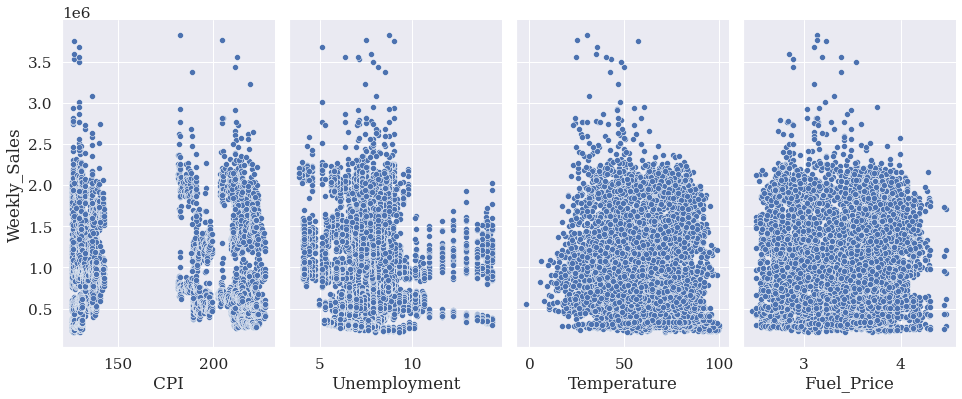

In [26]:
sns.pairplot(df, x_vars=["CPI", "Unemployment", "Temperature","Fuel_Price"], y_vars=["Weekly_Sales"], height=5.7, aspect=0.6)

Percebe-se que a correlação das variáveis `CPI`, `Unemployment`, `Temperature`,`Fuel_Price` com a variável `Weekly_Sales` não é significativa

In [27]:
#agrupando o dataframe pela média das variáveis numericas por lojas e por ano
df_grouped = df.groupby(["Store", "year_sale"]).mean().reset_index()
#Calculando a taxa de crescimento anual de cada loja
#A função calcula a variação de crescimento com relação ao ano anterior e acrescenta 0 na falta de comparativo
df_grouped["Crescimento Anual"] = df_grouped.groupby("Store")["Weekly_Sales"].apply(lambda x: (x/x.shift(1)-1).fillna(0)).mul(100)


In [28]:
df_grouped.head()

,Store,year_sale,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Crescimento Anual
0,1,2010,1.526642e+06,67.497500,2.696854,211.305760,7.860729,0.000000
1,1,2011,1.556191e+06,67.658269,3.429250,215.648064,7.817231,1.935516
2,1,2012,1.586094e+06,69.994419,3.549930,221.655342,7.080907,1.921591
3,2,2010,1.984956e+06,67.636667,2.696854,210.963620,8.182521,0.000000
4,2,2011,1.896305e+06,67.070577,3.429250,215.299494,7.809615,-4.466100


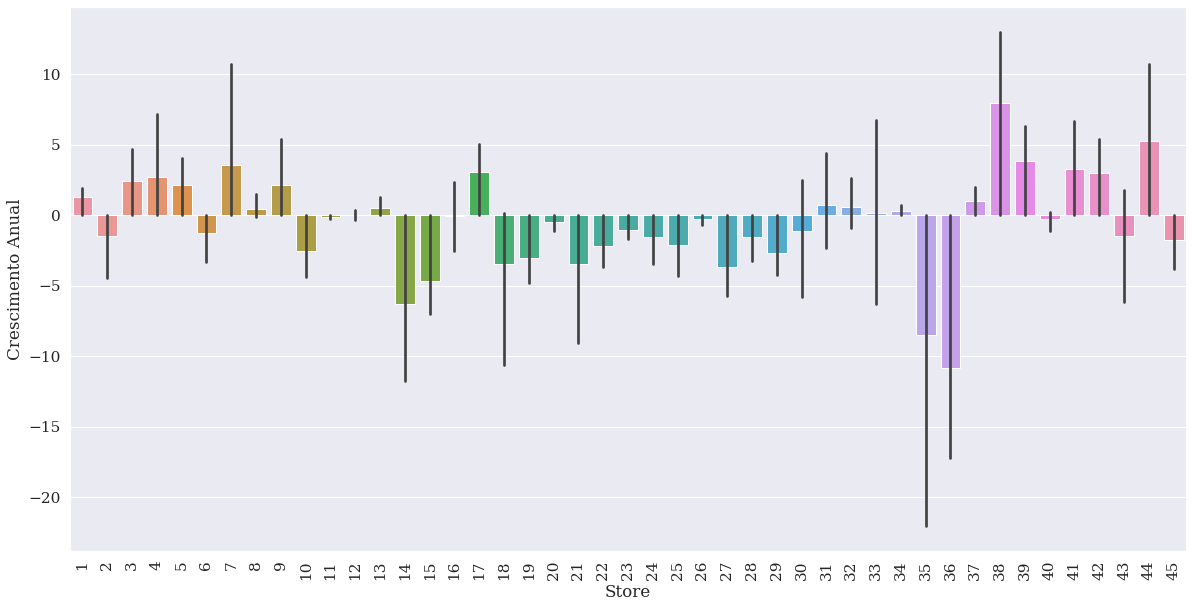

In [29]:
plt.figure(figsize = (20, 10))
sns.barplot(x="Store", y="Crescimento Anual", data=df_grouped)
plt.xticks(rotation=90)
plt.show()

In [30]:
#Crescimento médio anual de cada loja
df_grouped.groupby("Store")["Crescimento Anual"].mean().sort_values(ascending=False).head(5)

Store
38    7.984644
44    5.278440
39    3.825849
7     3.582474
41    3.258767
Name: Crescimento Anual, dtype: float64

Com base no crescimento anual médio de cada loja, temos a `Store_38` com maior potencial para investimento, na comparação dos três anos analisados, pois apresentou a melhor taxa de crescimento médio com relação ao ano anterior

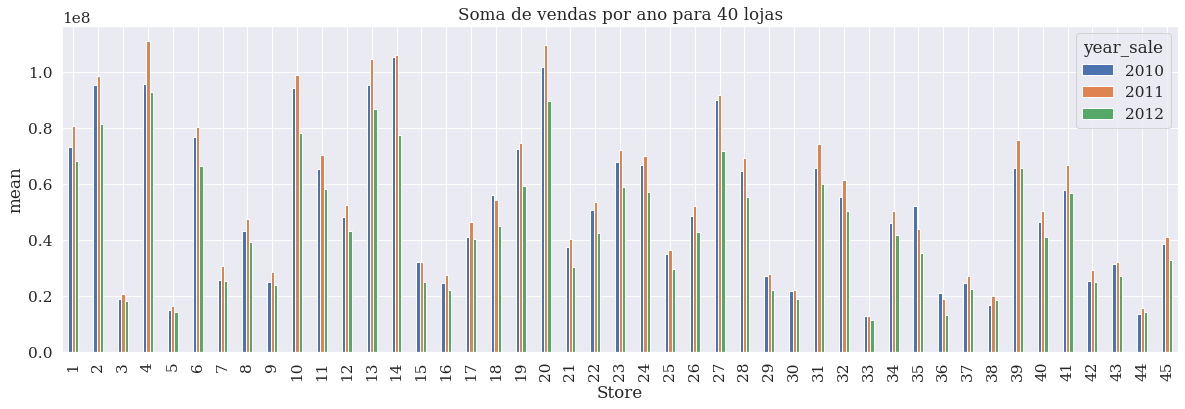

In [33]:
sum_sales_store = df.groupby(['Store','year_sale'])['Weekly_Sales'].sum().unstack()
ax = sum_sales_store.plot(
    kind="bar", position=0.5, width=0.4, figsize=(20,6))
# Adicionar rótulos aos eixos x e y
ax.set_xlabel("Store")
ax.set_ylabel("mean")
ax.set_title("Soma de vendas por ano para 40 lojas")
# Exibir o gráfico
plt.show()

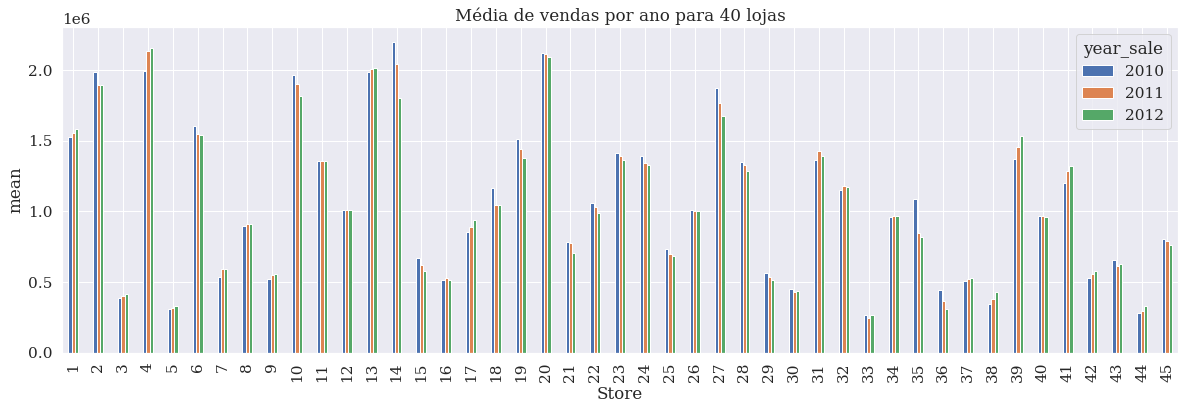

In [34]:
mean_sales_store = df.groupby(['Store','year_sale'])['Weekly_Sales'].mean().unstack()
ax = mean_sales_store.plot(
    kind="bar", position=0.5, width=0.4, figsize=(20,6))
# Adicionar rótulos aos eixos x e y
ax.set_xlabel("Store")
ax.set_ylabel("mean")
ax.set_title("Média de vendas por ano para 40 lojas")
# Exibir o gráfico
plt.show()

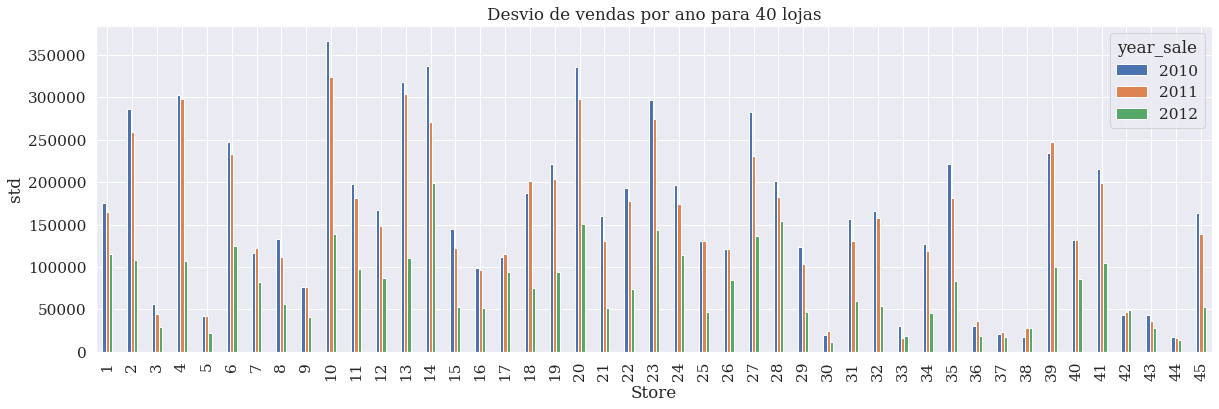

In [38]:
std_sales_store = df.groupby(['Store','year_sale'])['Weekly_Sales'].std().unstack()
ax = std_sales_store.plot(
    kind="bar", position=0.5, width=0.4, figsize=(20,6))
# Adicionar rótulos aos eixos x e y
ax.set_xlabel("Store")
ax.set_ylabel("std")
ax.set_title("Desvio de vendas por ano para 40 lojas")
# Exibir o gráfico
plt.show()

In [31]:
#agrupando pelas principais estatísticas
df_group = df.groupby(['Store', 'year_sale'])['Weekly_Sales'].describe().reset_index()

In [32]:
df_group[df_group['Store'].isin([38,44,39])]

,Store,year_sale,count,mean,std,min,25%,50%,75%,max
111,38,2010,48.0,3.455791e+05,17467.481442,303908.81,3.355493e+05,340858.355,3.565980e+05,383657.44
112,38,2011,52.0,3.834761e+05,27513.887877,341098.08,3.611428e+05,381930.575,4.024336e+05,449516.29
113,38,2012,43.0,4.332808e+05,27566.075206,397428.22,4.120906e+05,428465.110,4.504514e+05,499267.66
114,39,2010,48.0,1.370464e+06,234078.100607,1168582.02,1.259061e+06,1304906.185,1.370846e+06,2495489.25
115,39,2011,52.0,1.457262e+06,247351.141789,1158698.44,1.337802e+06,1410344.335,1.511312e+06,2554482.84
116,39,2012,43.0,1.532225e+06,100333.996597,1320301.61,1.470179e+06,1512227.340,1.591768e+06,1764847.94
129,44,2010,48.0,2.834900e+05,17039.383296,241937.11,2.745355e+05,282130.805,2.912438e+05,365098.24
130,44,2011,52.0,2.980422e+05,16752.638010,263917.85,2.874982e+05,297423.020,3.074285e+05,376233.89
131,44,2012,43.0,3.299389e+05,14116.587346,296947.06,3.203562e+05,331965.950,3.383935e+05,361067.07


Média: 1046523.07
Mediana: 970678.24
Curtose: -0.87
Assimetria: 0.44


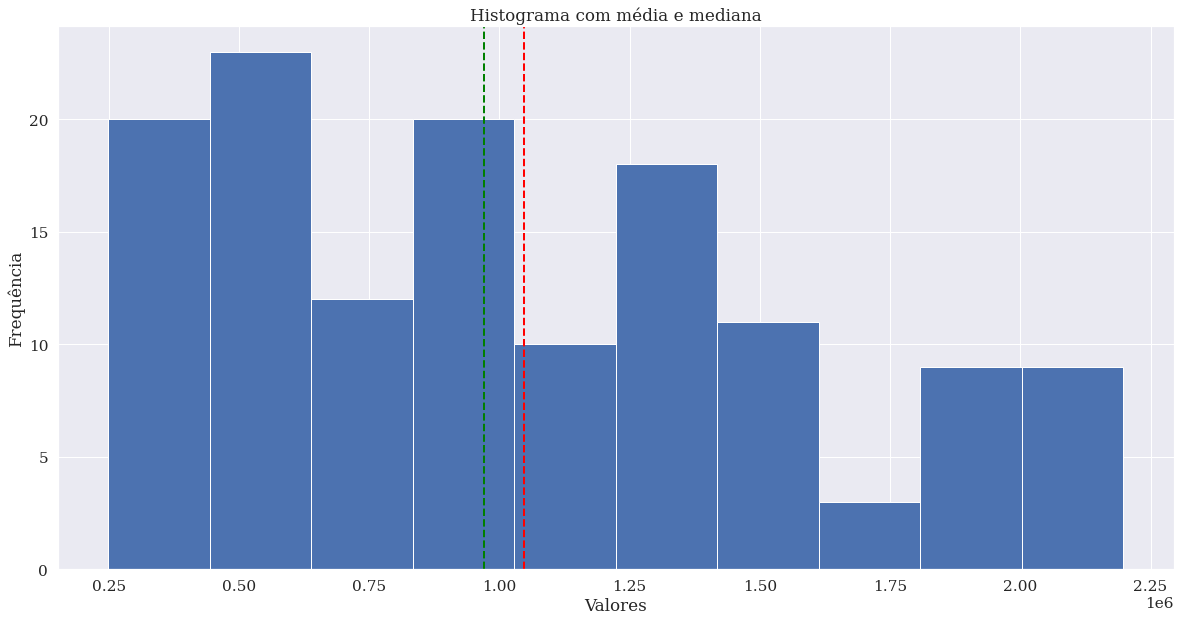

In [98]:
#df_hist = df[['year_sale','Weekly_Sales']].groupby(['year_sale'])['Weekly_Sales'].mean()

# Estatísticas de posição
media = df_group['mean'].mean()
mediana = df_group['mean'].median()
curtose = stats.kurtosis(df_grouped.Weekly_Sales)
assimetria = stats.skew(df_grouped.Weekly_Sales)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Curtose: {curtose:.2f}")
print(f"Assimetria: {assimetria:.2f}")

# Cria o histograma
plt.figure(figsize = (20, 10))
plt.hist(df_group['mean'])

# Adiciona as linhas de média e mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2)

# Configurações do gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma com média e mediana')

# Mostra o gráfico
plt.show()

In [65]:
# Calculando a curtose
curtose = df.groupby(["Store", "year_sale"])['Weekly_Sales'].apply(lambda x: x.kurtosis()).reset_index()
# Calculando a assimetria
assimetria = df.groupby(["Store", "year_sale"])['Weekly_Sales'].apply(lambda x: x.skew()).reset_index()
assimetria.head()

,Store,year_sale,Weekly_Sales
0,1,2010,3.037454
1,1,2011,2.143209
2,1,2012,0.417211
3,2,2010,3.353971
4,2,2011,3.363561


In [66]:
df_dist = df.groupby(['Store','year_sale'])['Weekly_Sales'].mean().reset_index()
df_dist['curtose'] = curtose.Weekly_Sales
df_dist['assimetria'] = assimetria.Weekly_Sales
df_dist.head()

,Store,year_sale,Weekly_Sales,curtose,assimetria
0,1,2010,1.526642e+06,12.398207,3.037454
1,1,2011,1.556191e+06,7.115564,2.143209
2,1,2012,1.586094e+06,0.657857,0.417211
3,2,2010,1.984956e+06,14.173936,3.353971
4,2,2011,1.896305e+06,14.069552,3.363561


<Axes: title={'center': 'Curtose por loja'}, xlabel='Store', ylabel='curtose'>

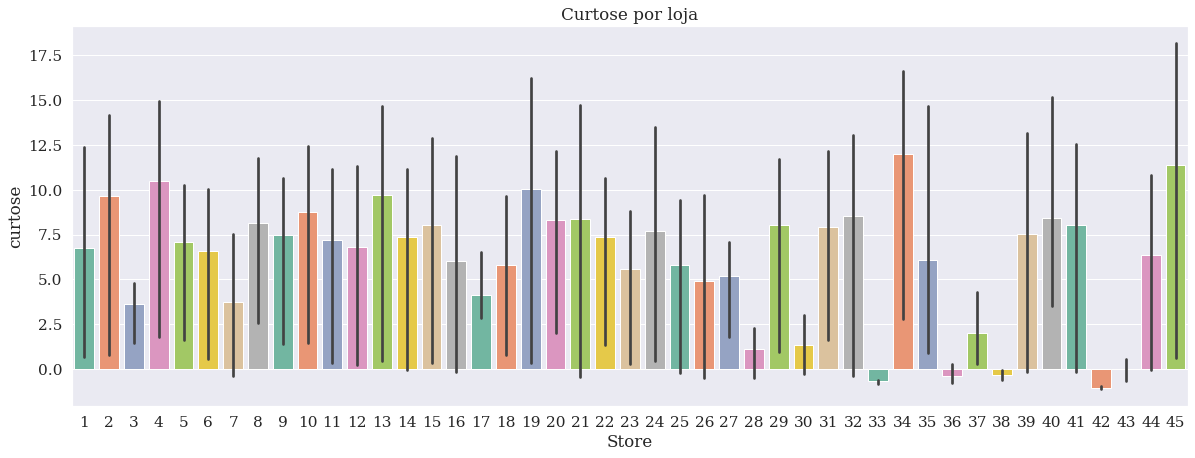

In [82]:
plt.figure(figsize=(20,7))
plt.title('Curtose por loja')
sns.barplot(x='Store',y='curtose', data=df_dist, palette='Set2')

<Axes: title={'center': 'Assimetria por loja'}, xlabel='Store', ylabel='assimetria'>

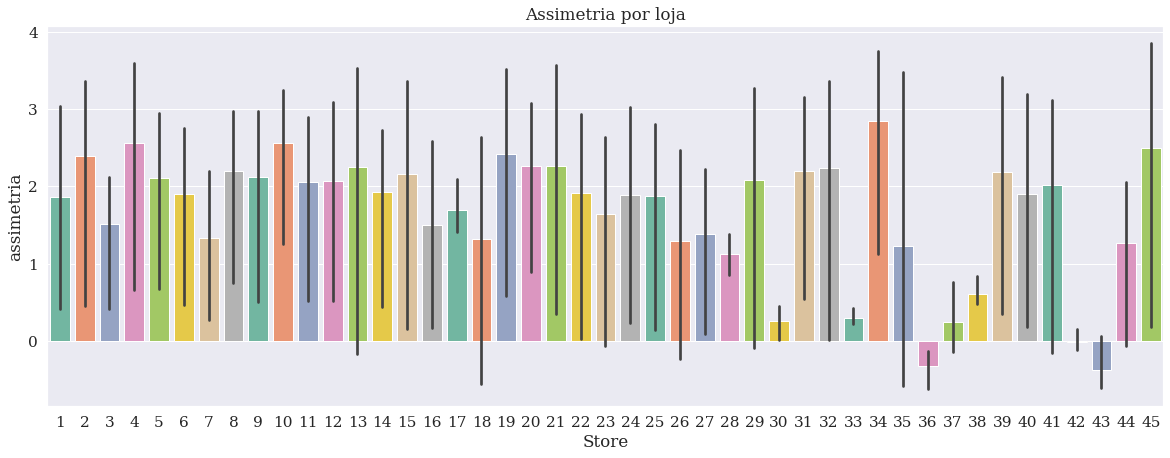

In [81]:
plt.figure(figsize=(20,7))
plt.title('Assimetria por loja')
sns.barplot(x='Store',y='assimetria', data=df_dist, palette='Set2')

### Conclusão

Com base nas análise estatística realizada, indico que o investimento seja realizado no `Store_38` devido os seguintes fatores:
* Apesar de não ser a de maior faturamento, apresentou a maior taxa de crescimento anual
* Quando comparada com as outras lojas é uma das poucas que o total de vendas de 2012 foi maior que 2010 
* Quando olhamos o faturamento médio, não é a que possui maior valor, porém ao contrário da maioria possui baixa dispersão (desvio padrão) e o valor médio e mediano é próximo (assimetria e curtose)

Concluímos assim, que o investimento é válido pois a sua taxa de crescimento anual é gradual com baixo risco, pois não sofre grandes variações.
Como próximos passos, sugiro a realização da predição de vendas dos próximos três anos, para estimar o tamanho do crescimento possível

Pondero a necessidade de um acompanhamento nas lojas de maior faturamento para tentar entender a queda brusca nas vendas de 2012